# Page Rank

## Visualisasi Data

Page rank menggunakan data link berita Detik.

In [7]:
import pandas as pd
df = pd.read_csv('pagerank.csv')
df

,Halaman Sumber,Link Keluar (Internal)
0,https://www.detik.com,https://www.detik.com/?tagfrom=framebar
1,https://www.detik.com,https://www.detik.com/terpopuler
2,https://www.detik.com,https://20.detik.com/live
3,https://www.detik.com,https://news.detik.com/kolom/kirim
4,https://www.detik.com,https://news.detik.com
...,...,...
43250,https://hot.detik.com/celeb/d-8189249/deddy-co...,https://www.detik.com/kotak-pos
43251,https://hot.detik.com/celeb/d-8189249/deddy-co...,https://www.detik.com/media-partner
43252,https://hot.detik.com/celeb/d-8189249/deddy-co...,https://www.detik.com/info-iklan
43253,https://hot.detik.com/celeb/d-8189249/deddy-co...,https://www.detik.com/privacy-policy


## Visualisasi Keseluruhan Relasi Node

Kolom yang tersedia: ['Halaman Sumber', 'Link Keluar (Internal)']

📊 Data sebelum pembersihan:
   Jumlah baris: 43255
📊 Data setelah pembersihan:
   Jumlah baris: 43255

✅ Jaringan berhasil dimuat.
   Jumlah Node: 6533
   Jumlah Edge: 43255

🏆 10 Halaman dengan PageRank Tertinggi:
                        Halaman Sumber  PageRank_Score
                https://news.detik.com        0.002081
                 https://fyb.detik.com        0.001631
             https://adsmart.detik.com        0.001599
                 https://www.detik.com        0.001586
https://www.detik.com/signature-awards        0.001569
              https://news.detik.com/x        0.001549
          https://rekomendit.detik.com        0.001493
          https://pasangmata.detik.com        0.001488
           https://www.detik.com/sumut        0.001468
             https://www.detik.com/pop        0.001468

💾 Hasil PageRank disimpan ke: hasil_pagerank_detik.csv

📈 Analisis Jaringan:
   Density: 0.001014
   Apakah stro

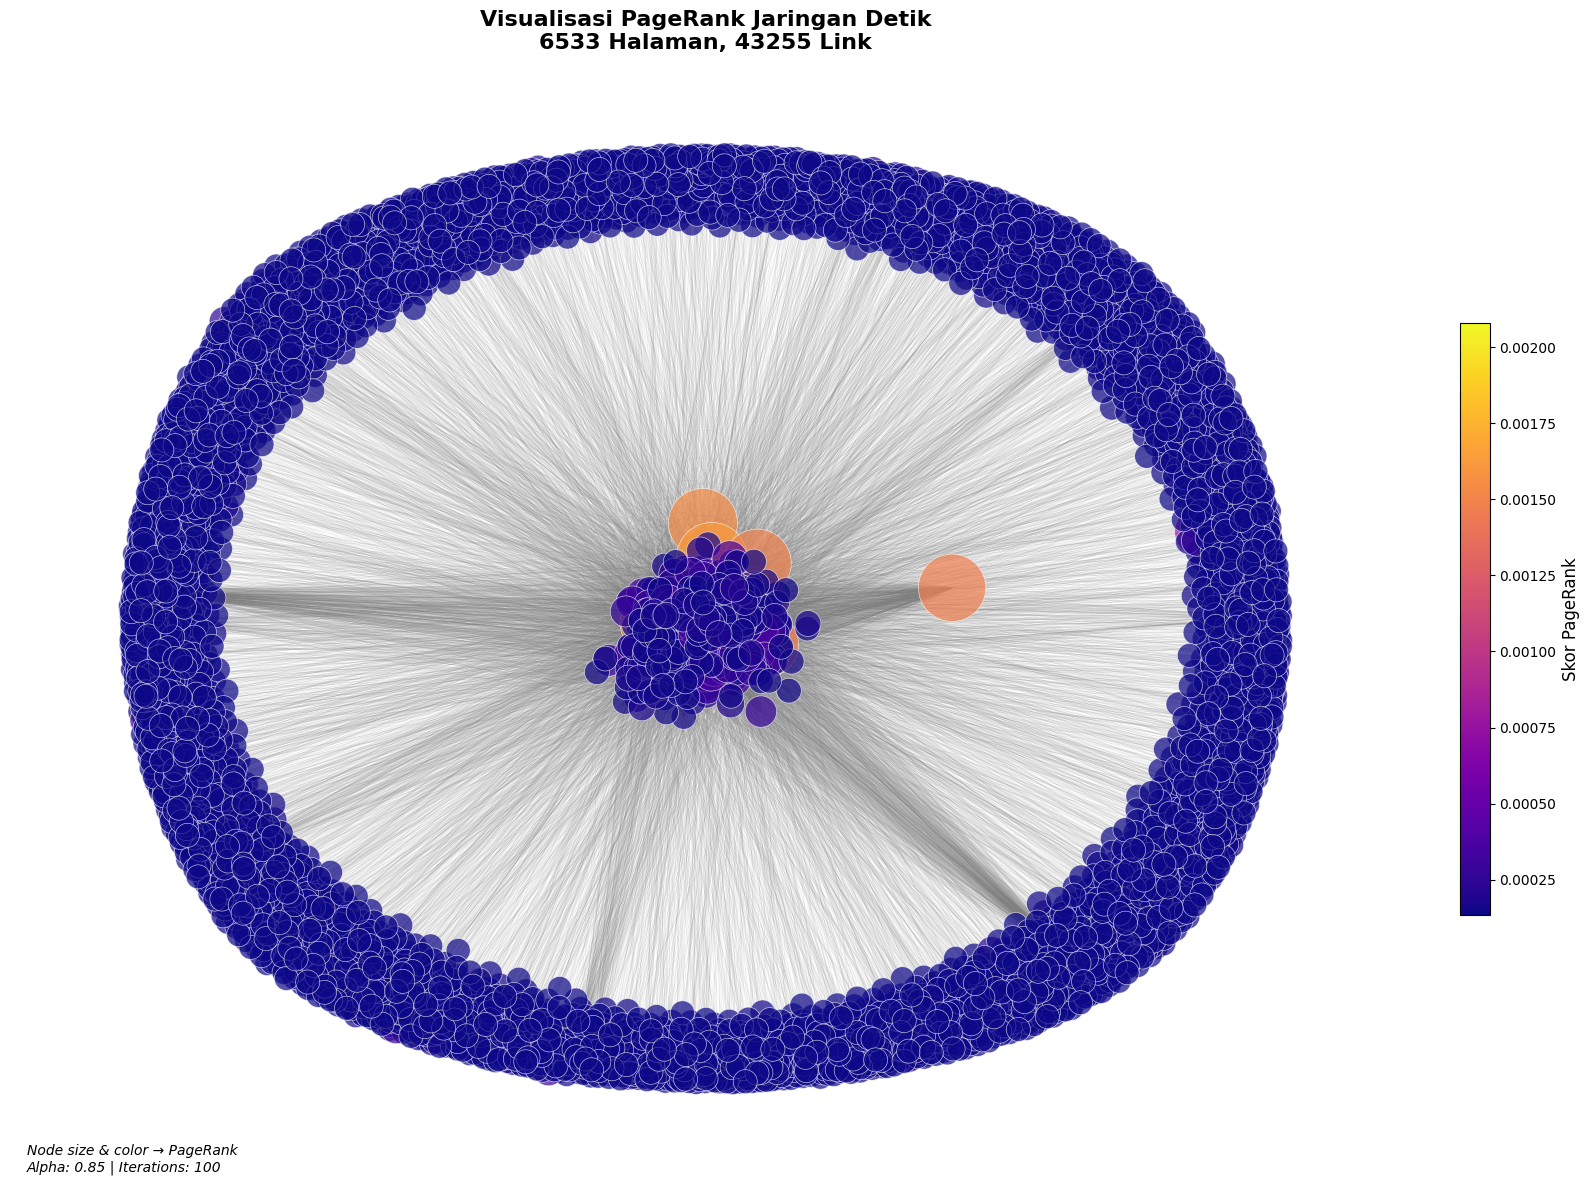


🎯 Membuat visualisasi untuk 20 halaman teratas...


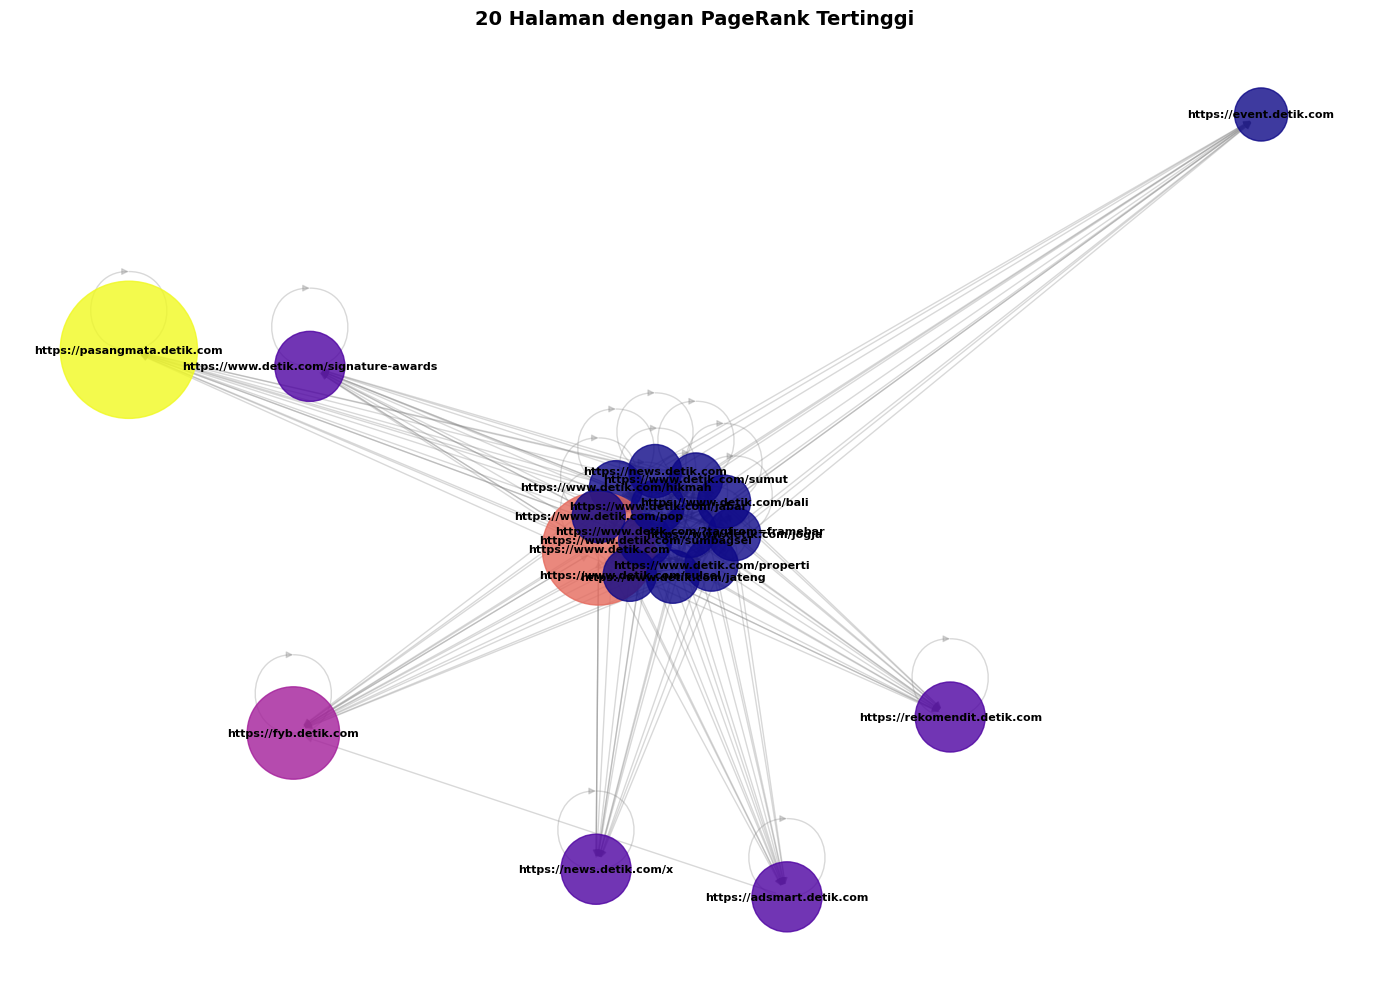

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def hitung_pagerank_dan_visualisasi(nama_file):
    """
    Menghitung PageRank dari data edge dan memvisualisasikan jaringan.

    Args:
        nama_file (str): Nama file input (mis. 'pagerank.csv').
    """
    try:
        # 1. MEMBACA DATA
        # File CSV dengan header: id_berita, page, link_keluar
        df = pd.read_csv(nama_file)
        
        # Memeriksa kolom yang tersedia
        print(f"Kolom yang tersedia: {df.columns.tolist()}")
        
    except FileNotFoundError:
        print(f"ERROR: File '{nama_file}' tidak ditemukan. Pastikan nama dan jalur file sudah benar.")
        return
    except Exception as e:
        print(f"ERROR: Gagal membaca file - {e}")
        return

    # 2. MEMERIKSA DAN MEMBERSIHKAN DATA
    print(f"\n📊 Data sebelum pembersihan:")
    print(f"   Jumlah baris: {len(df)}")
    
    # Menghapus baris dengan nilai NaN
    df_clean = df.dropna(subset=['Halaman Sumber', 'Link Keluar (Internal)'])
    
    # Menghapus duplikat edge
    df_clean = df_clean.drop_duplicates(subset=['Halaman Sumber', 'Link Keluar (Internal)'])
    
    print(f"📊 Data setelah pembersihan:")
    print(f"   Jumlah baris: {len(df_clean)}")
    
    if len(df_clean) == 0:
        print("ERROR: Tidak ada data yang valid setelah pembersihan.")
        return

    # 3. MEMBUAT GRAF BERARAH (DiGraph)
    G = nx.from_pandas_edgelist(
        df_clean,
        source='Halaman Sumber',        # Sumber: halaman asal
        target='Link Keluar (Internal)', # Target: halaman tujuan
        create_using=nx.DiGraph()
    )

    print(f"\n✅ Jaringan berhasil dimuat.")
    print(f"   Jumlah Node: {G.number_of_nodes()}")
    print(f"   Jumlah Edge: {G.number_of_edges()}")

    # 4. MENGHITUNG PAGERANK
    pagerank_scores = nx.pagerank(G, alpha=0.85, max_iter=100)
    
    # Mengubah hasil ke DataFrame untuk analisis yang mudah
    pr_df = pd.DataFrame(
        list(pagerank_scores.items()),
        columns=['Halaman Sumber', 'PageRank_Score']
    ).sort_values(by='PageRank_Score', ascending=False)
    
    print("\n🏆 10 Halaman dengan PageRank Tertinggi:")
    print(pr_df.head(10).to_string(index=False))

    # Menyimpan hasil PageRank ke file CSV
    output_filename = 'hasil_pagerank_detik.csv'
    pr_df.to_csv(output_filename, index=False)
    print(f"\n💾 Hasil PageRank disimpan ke: {output_filename}")

    # 5. ANALISIS TAMBAHAN
    print(f"\n📈 Analisis Jaringan:")
    print(f"   Density: {nx.density(G):.6f}")
    print(f"   Apakah strongly connected: {nx.is_strongly_connected(G)}")
    print(f"   Apakah weakly connected: {nx.is_weakly_connected(G)}")
    
    # Komponen terbesar
    if not nx.is_weakly_connected(G):
        largest_cc = max(nx.weakly_connected_components(G), key=len)
        print(f"   Ukuran komponen terbesar: {len(largest_cc)} node")

    # 6. MEMPERSIAPKAN VISUALISASI
    
    # 6.1. Normalisasi Skor PageRank untuk ukuran node
    scores_list = list(pagerank_scores.values())
    
    if len(scores_list) > 1:
        min_score = min(scores_list)
        max_score = max(scores_list)
        
        # Scaling Node Size
        node_size = [
            ((score - min_score) / (max_score - min_score) + 0.1) * 3000 
            for score in scores_list
        ]
    else:
        # Fallback untuk kasus dengan sedikit node
        node_size = [1000] * len(scores_list)
    
    node_color = scores_list

    # 6.2. Pengaturan Layout
    print("\n⏳ Menghitung layout visualisasi...")
    
    # Untuk graf yang besar, gunakan layout yang lebih efisien
    if G.number_of_nodes() > 1000:
        print("   (Graf besar, menggunakan layout yang dioptimalkan...)")
        pos = nx.spring_layout(G, k=0.05, iterations=50, seed=42)
    else:
        pos = nx.spring_layout(G, k=0.1, iterations=100, seed=42)

    # 7. VISUALISASI
    plt.figure(figsize=(16, 12))
    
    # Drawing nodes
    nodes = nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_size,
        node_color=node_color,
        cmap=plt.cm.plasma, # Colormap alternatif
        alpha=0.7,
        linewidths=0.5,
        edgecolors='white'
    )
    
    # Drawing edges
    nx.draw_networkx_edges(
        G,
        pos,
        edge_color='gray',
        alpha=0.15,
        width=0.3,
        arrows=False
    )

    # Judul dan label
    plt.title(
        f"Visualisasi PageRank Jaringan Detik\n"
        f"{G.number_of_nodes()} Halaman, {G.number_of_edges()} Link", 
        fontsize=16, 
        weight='bold'
    )
    
    # Colorbar
    if len(scores_list) > 1:
        sm = plt.cm.ScalarMappable(
            cmap=plt.cm.plasma, 
            norm=plt.Normalize(vmin=min_score, vmax=max_score)
        )
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.02, pad=0.04)
        cbar.set_label('Skor PageRank', fontsize=12)
    
    plt.axis('off')
    
    # Tambahkan informasi pada plot
    plt.figtext(0.02, 0.02, 
                f"Node size & color → PageRank\n"
                f"Alpha: 0.85 | Iterations: 100", 
                fontsize=10, 
                style='italic')
    
    plt.tight_layout()
    plt.show()

    # 8. VISUALISASI ALTERNATIF - TOP 20 NODES
    print("\n🎯 Membuat visualisasi untuk 20 halaman teratas...")
    
    # Ambil 20 node dengan PageRank tertinggi
    top_nodes = pr_df.head(20)['Halaman Sumber'].tolist()
    
    # Buat subgraph dari node teratas
    G_top = G.subgraph(top_nodes).copy()
    
    if G_top.number_of_nodes() > 0:
        plt.figure(figsize=(14, 10))
        
        # Hitung ulang PageRank untuk subgraph
        pagerank_top = nx.pagerank(G_top, alpha=0.85)
        
        # Layout untuk subgraph
        pos_top = nx.spring_layout(G_top, k=1, iterations=100, seed=42)
        
        # Node size berdasarkan PageRank
        node_sizes_top = [pagerank_top[node] * 50000 for node in G_top.nodes()]
        
        # Draw
        nx.draw_networkx_nodes(
            G_top, 
            pos_top, 
            node_size=node_sizes_top,
            node_color=list(pagerank_top.values()),
            cmap=plt.cm.plasma,
            alpha=0.8
        )
        
        nx.draw_networkx_edges(G_top, pos_top, alpha=0.3, edge_color='gray')
        
        # Label node
        nx.draw_networkx_labels(
            G_top, 
            pos_top, 
            font_size=8,
            font_weight='bold'
        )
        
        plt.title("20 Halaman dengan PageRank Tertinggi", fontsize=14, weight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# --- EKSEKUSI ---
# Ganti nama file di bawah ini dengan nama file Anda:
hitung_pagerank_dan_visualisasi('pagerank.csv')

## Node dengan relasi terbanyak

Kolom yang tersedia: ['Halaman Sumber', 'Link Keluar (Internal)']
✅ Jaringan berhasil dimuat (Total Node: 6533, Total Edge: 43255).
--------------------------------------------------
🥇 Halaman Terpenting (PageRank Tertinggi): 'https://news.detik.com'
   Skor PageRank: 0.002081
   Banyaknya Halaman yang Terhubung Langsung: 498
   - Halaman yang di-link: 128
   - Halaman yang men-link: 489
--------------------------------------------------
⏳ Menghitung layout visualisasi...


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


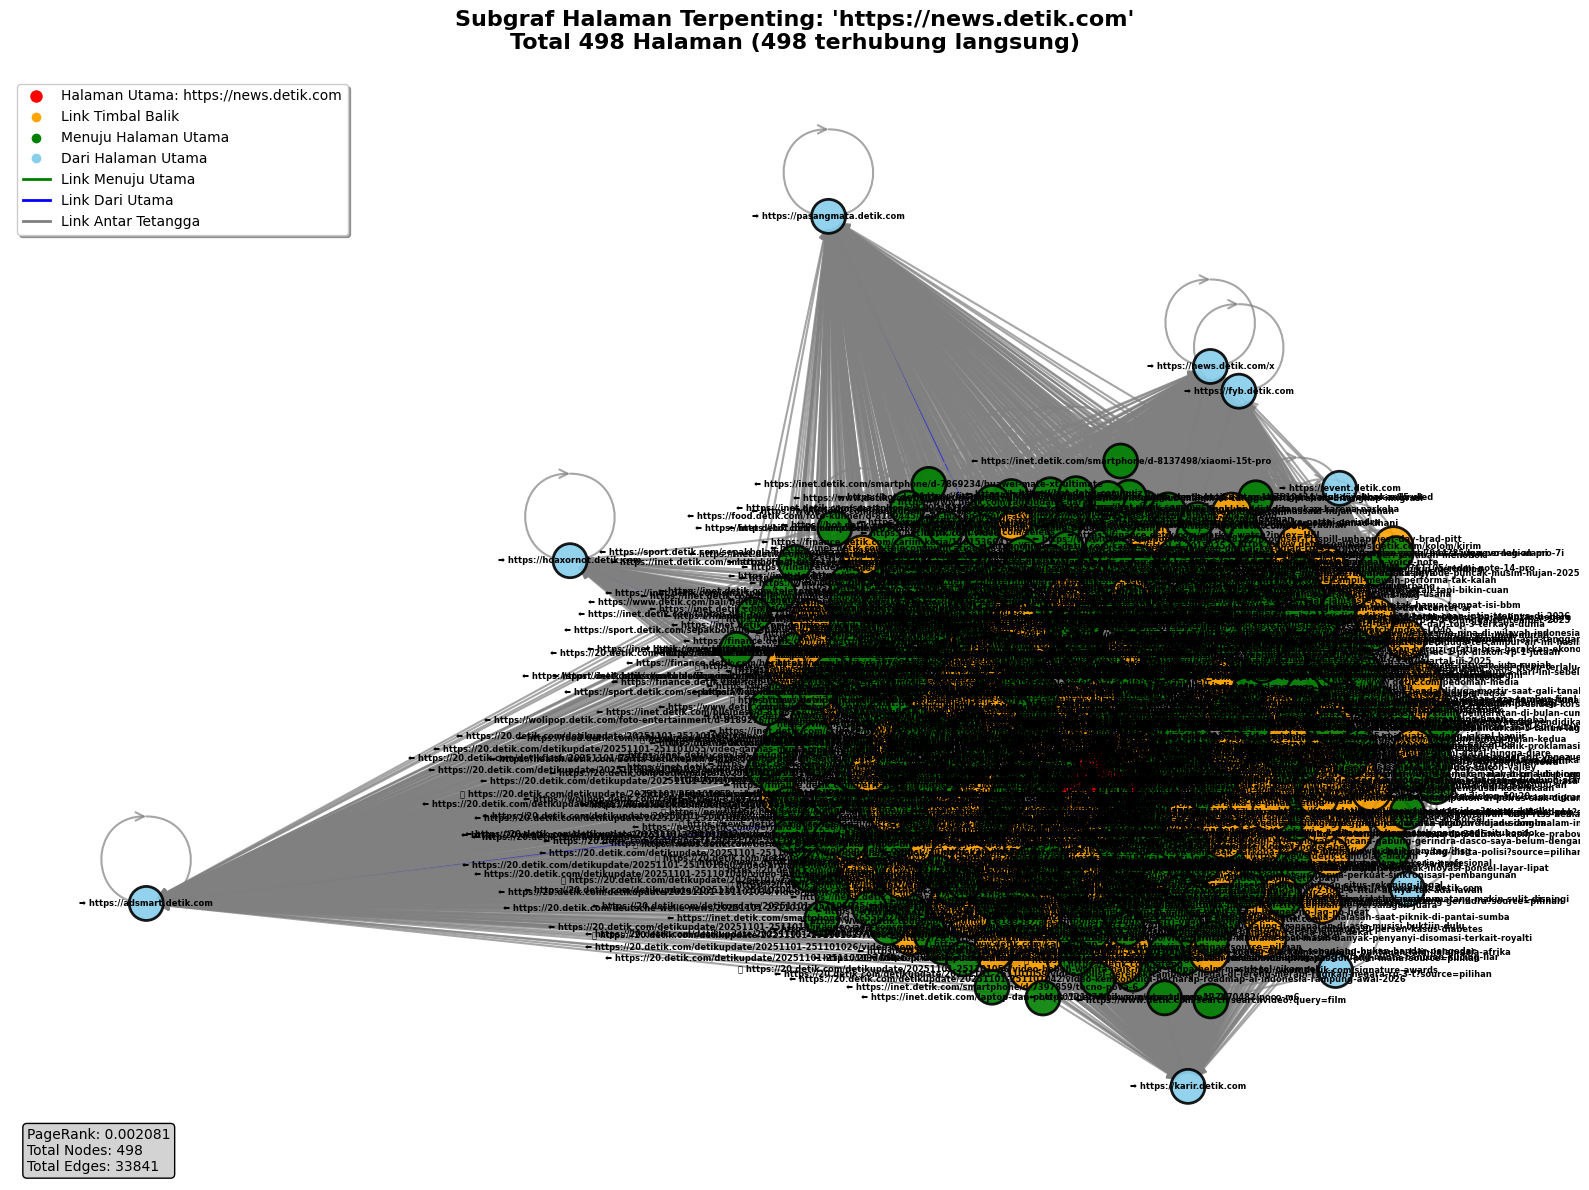


📊 Analisis Subgraf:
   - Node dalam subgraf: 498
   - Edge dalam subgraf: 33841
   - Density subgraf: 0.1367
   - In-degree node utama: 489
   - Out-degree node utama: 128


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def visualisasi_subgraf_berdasarkan_pagerank(nama_file):
    """
    Mengidentifikasi node dengan PageRank tertinggi dan memvisualisasikan 
    node tersebut beserta semua node yang terhubung langsung.
    """
    try:
        # 1. MEMBACA DATA - Disesuaikan untuk file pagerank.csv
        df = pd.read_csv(nama_file)
        
        # Memeriksa kolom yang tersedia
        print(f"Kolom yang tersedia: {df.columns.tolist()}")
        
        # Membersihkan data
        df_clean = df.dropna(subset=['Halaman Sumber', 'Link Keluar (Internal)'])
        df_clean = df_clean.drop_duplicates(subset=['Halaman Sumber', 'Link Keluar (Internal)'])
        
        if len(df_clean) == 0:
            print("ERROR: Tidak ada data yang valid setelah pembersihan.")
            return
            
    except FileNotFoundError:
        print(f"ERROR: File '{nama_file}' tidak ditemukan.")
        return
    except Exception as e:
        print(f"ERROR: Gagal membaca file - {e}")
        return

    # 2. MEMBUAT GRAF BERARAH (DiGraph) - Disesuaikan kolom
    G = nx.from_pandas_edgelist(
        df_clean,
        source='Halaman Sumber',        # Kolom sumber: page
        target='Link Keluar (Internal)', # Kolom target: link_keluar
        create_using=nx.DiGraph()
    )

    print(f"✅ Jaringan berhasil dimuat (Total Node: {G.number_of_nodes()}, Total Edge: {G.number_of_edges()}).")
    
    # 3. MENGHITUNG PAGERANK
    pagerank_scores = nx.pagerank(G, alpha=0.85, max_iter=100)
    
    # 4. MENCARI NODE DENGAN PAGERANK TERTINGGI
    if not pagerank_scores:
        print("ERROR: PageRank tidak dapat dihitung.")
        return

    # Node dengan PageRank tertinggi
    main_node = max(pagerank_scores, key=pagerank_scores.get)
    max_pagerank = pagerank_scores[main_node]

    print("-" * 50)
    print(f"🥇 Halaman Terpenting (PageRank Tertinggi): '{main_node}'")
    print(f"   Skor PageRank: {max_pagerank:.6f}")

    # 5. MENGIDENTIFIKASI TETANGGA (NEIGHBORS)
    # Mengumpulkan semua tetangga (suksesor dan predesesor)
    successors = list(G.successors(main_node))   # Halaman yang di-link dari main node
    predecessors = list(G.predecessors(main_node)) # Halaman yang men-link ke main node
    
    neighbors = set(successors) | set(predecessors)
    nodes_to_include = {main_node} | neighbors
    num_connected_nodes = len(neighbors) 
    
    print(f"   Banyaknya Halaman yang Terhubung Langsung: {num_connected_nodes}")
    print(f"   - Halaman yang di-link: {len(successors)}")
    print(f"   - Halaman yang men-link: {len(predecessors)}")
    print("-" * 50)

    # 6. MEMBUAT SUBGRAPH & PERSIAPAN VISUALISASI
    subgraph = G.subgraph(nodes_to_include)
    
    node_sizes = []
    node_colors = []
    node_labels = {}
    
    # Atur ukuran dan warna node berdasarkan peran
    for node in subgraph.nodes():
        if node == main_node:
            # Node utama - terbesar dan merah
            node_sizes.append(3000)
            node_colors.append('red')
            node_labels[node] = f"⭐ {node}"
        elif node in predecessors and node in successors:
            # Node yang both predecessor dan successor - oranye
            node_sizes.append(800)
            node_colors.append('orange')
            node_labels[node] = f"🔄 {node}"
        elif node in predecessors:
            # Node yang men-link ke main node - hijau
            node_sizes.append(600)
            node_colors.append('green')
            node_labels[node] = f"⬅️ {node}"
        else:
            # Node yang di-link dari main node - biru
            node_sizes.append(600)
            node_colors.append('skyblue')
            node_labels[node] = f"➡️ {node}"

    print("⏳ Menghitung layout visualisasi...")
    
    # Layout yang berbeda untuk berbagai ukuran graf
    if len(nodes_to_include) > 50:
        pos = nx.spring_layout(subgraph, k=1.5, iterations=100, seed=42)
    else:
        pos = nx.spring_layout(subgraph, k=1.0, iterations=100, seed=42)

    # 7. VISUALISASI UTAMA
    plt.figure(figsize=(16, 12))
    
    plt.title(
        f"Subgraf Halaman Terpenting: '{main_node}'\n"
        f"Total {len(nodes_to_include)} Halaman ({num_connected_nodes} terhubung langsung)", 
        fontsize=16, 
        weight='bold',
        pad=20
    )
    
    # Menggambar edges dengan warna berbeda berdasarkan arah
    edge_colors = []
    for u, v in subgraph.edges():
        if u == main_node:
            # Edge keluar dari main node - biru
            edge_colors.append('blue')
        elif v == main_node:
            # Edge masuk ke main node - hijau
            edge_colors.append('green')
        else:
            # Edge antara tetangga - abu-abu
            edge_colors.append('gray')
    
    # Draw edges
    nx.draw_networkx_edges(
        subgraph, pos, 
        edge_color=edge_colors, 
        alpha=0.7, 
        width=1.5, 
        arrows=True, 
        arrowsize=15,
        arrowstyle='->'
    )
    
    # Draw nodes
    nx.draw_networkx_nodes(
        subgraph, pos, 
        node_size=node_sizes, 
        node_color=node_colors, 
        alpha=0.9, 
        linewidths=2, 
        edgecolors='black'
    )
    
    # Draw labels dengan penyesuaian font size
    font_size = 6 if len(nodes_to_include) > 30 else 8
    nx.draw_networkx_labels(
        subgraph, pos, 
        labels=node_labels, 
        font_size=font_size, 
        font_color='black',
        font_weight='bold'
    )

    # 8. LEGENDA DETAIL
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=f'Halaman Utama: {main_node}'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='Link Timbal Balik'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Menuju Halaman Utama'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=8, label='Dari Halaman Utama'),
        plt.Line2D([0], [0], color='green', lw=2, label='Link Menuju Utama'),
        plt.Line2D([0], [0], color='blue', lw=2, label='Link Dari Utama'),
        plt.Line2D([0], [0], color='gray', lw=2, label='Link Antar Tetangga')
    ]
    
    plt.legend(
        handles=legend_elements, 
        loc='upper left', 
        bbox_to_anchor=(0, 1),
        frameon=True,
        fancybox=True,
        shadow=True
    )
    
    # Informasi tambahan
    plt.figtext(
        0.02, 0.02, 
        f"PageRank: {max_pagerank:.6f}\n"
        f"Total Nodes: {len(nodes_to_include)}\n"
        f"Total Edges: {subgraph.number_of_edges()}",
        fontsize=10, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray")
    )
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # 9. ANALISIS TAMBAHAN
    print("\n📊 Analisis Subgraf:")
    print(f"   - Node dalam subgraf: {len(nodes_to_include)}")
    print(f"   - Edge dalam subgraf: {subgraph.number_of_edges()}")
    print(f"   - Density subgraf: {nx.density(subgraph):.4f}")
    
    # Hitung degree untuk node utama
    in_degree = G.in_degree(main_node)
    out_degree = G.out_degree(main_node)
    print(f"   - In-degree node utama: {in_degree}")
    print(f"   - Out-degree node utama: {out_degree}")

# --- EKSEKUSI ---
visualisasi_subgraf_berdasarkan_pagerank('pagerank.csv')